In [30]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("/home/cgarcia_2002/nHits_count")

import functions_nHits  # Importa la función que necesitas
import importlib
import functions_spills

importlib.reload(functions_nHits)
importlib.reload(functions_spills)

%matplotlib inline

In [31]:
root_file_path = "/data/cgarcia_2002/WCTE/data/2384_calib_time/WCTE_offline_R2384S0P0.root" #bkg
#root_file_path = "/data/cgarcia_2002/WCTE/data/2385_calib_time/WCTE_offline_R2385S0P0.root"  #signal

# Open the ROOT file and get the TTree
file = uproot.open(root_file_path)

tree = file["WCTEReadoutWindows"]  

#DOWNLOAD INFO OF THE TREE
times_branch = tree["hit_pmt_calibrated_times"].array(library="np")
charge_branch = tree["hit_pmt_charges"].array(library="np")
event_number_branch = tree["event_number"].array(library="np")

mpmt_id_branch = tree["hit_mpmt_card_ids"].array(library="np")

times_branch_sorted = []
charge_branch_sorted = []
mpmt_id_branch_sorted = []

for times_evt, charges_evt, mpmt_evt in zip(times_branch, charge_branch, mpmt_id_branch):
    idx_sorted = np.argsort(times_evt)  # índice de orden
    times_branch_sorted.append(times_evt[idx_sorted])
    charge_branch_sorted.append(charges_evt[idx_sorted])
    mpmt_id_branch_sorted.append(mpmt_evt[idx_sorted])

In [32]:
#root_file_path = "/data/cgarcia_2002/WCTE/data/2384_calib_time/WCTE_offline_R2384S0P0.root" #bkg
root_file_path = "/data/cgarcia_2002/WCTE/data/2385_calib_time/WCTE_offline_R2385S0P0.root"  #signal

# Open the ROOT file and get the TTree
file = uproot.open(root_file_path)

tree_sig = file["WCTEReadoutWindows"]  

#DOWNLOAD INFO OF THE TREE
times_branch_sig = tree_sig["hit_pmt_calibrated_times"].array(library="np")
charge_branch_sig = tree_sig["hit_pmt_charges"].array(library="np")
event_number_branch_sig = tree_sig["event_number"].array(library="np")
mpmt_id_branch_sig = tree_sig["hit_mpmt_card_ids"].array(library="np")

times_branch_sorted_sig = []
charge_branch_sorted_sig = []
mpmt_id_branch_sorted_sig = []

for times_evt, charges_evt, mpmt_evt in zip(times_branch_sig, charge_branch_sig, mpmt_id_branch_sig):
    idx_sorted = np.argsort(times_evt)  # índice de orden
    times_branch_sorted_sig.append(times_evt[idx_sorted])
    charge_branch_sorted_sig.append(charges_evt[idx_sorted])
    mpmt_id_branch_sorted_sig.append(mpmt_evt[idx_sorted])

In [33]:
#times_branch_modified_2, charge_branch_modified_chargesTT, threshold_charges = functions_spills.repeat_spills_Charge(event_number_branch, times_branch_sorted, charge_branch_sorted)
times_branch_modified, threshold_times, deleted_index_dict = functions_spills.repeat_spills_nHits(event_number_branch, times_branch_sorted, 80, 5000, 4000)
times_branch_modified_sig, threshold_times_sig, deleted_index_dict_sig = functions_spills.repeat_spills_nHits(event_number_branch_sig, times_branch_sorted_sig, 80, 5000, 4000)


In [34]:
print(threshold_times)

{0: [217193.85035722656], 1: [74913.43695199219], 2: [36291.48129898438], 6: [195415.1007826172], 7: [156021.14943867188], 9: [135880.6137286719], 11: [194171.69019066406], 12: [254083.72742441407], 13: [121752.56322285156], 14: [21849.091558789063, 149371.2463385547], 17: [96384.88962680468], 19: [184204.05886308593, 253859.43659921875], 21: [119096.67077109375], 25: [242640.99467257812], 35: [131882.7571], 41: [175789.8087253906], 43: [72881.9740158203], 46: [87956.98471902344], 47: [240435.40919609374], 48: [63628.19932832031], 49: [33633.14045261719], 53: [139740.22916953126], 55: [60024.07064550781, 128888.27422246094], 56: [178010.53717023437], 57: [150931.3676453125], 60: [265332.2800494141], 62: [61680.74866621094, 228824.6699826172, 261587.06875996094], 63: [10137.11456765625, 104615.51561542969], 65: [190216.22507640626], 67: [64714.33979941406], 68: [19926.9210109375], 73: [133506.95188960937], 74: [871.1662740234375], 78: [13552.75074140625], 81: [216081.51863], 82: [1103.3

In [35]:
charge_branch_filtered = []

for event, charge_list in enumerate(charge_branch_sorted):
    if event in deleted_index_dict:
        indices_to_delete = set(deleted_index_dict[event])  # convert to set for faster lookup

        # Keep elements whose index is NOT in indices_to_delete
        filtered_list = [t for i, t in enumerate(charge_list) if i not in indices_to_delete]
    else:
        filtered_list = charge_list.copy()

    charge_branch_filtered.append(np.array(filtered_list))

In [36]:
charge_branch_filtered_sig = []

for event, charge_list in enumerate(charge_branch_sorted_sig):
    if event in deleted_index_dict_sig:
        indices_to_delete = set(deleted_index_dict_sig[event])  # convert to set for faster lookup

        # Keep elements whose index is NOT in indices_to_delete
        filtered_list = [t for i, t in enumerate(charge_list) if i not in indices_to_delete]
    else:
        filtered_list = charge_list.copy()

    charge_branch_filtered_sig.append(np.array(filtered_list))

In [37]:
times_branch_modified_chargesTT, charge_branch_modified_chargesTT, threshold_charges, deleted_indices = functions_spills.repeat_spills_Charge(event_number_branch, times_branch_modified, charge_branch_filtered, 50, 50, threshold = 5000)

times_branch_modified_chargesTT_sig, charge_branch_modified_chargesTT_sig, threshold_charges_sig, deleted_indices_sig = functions_spills.repeat_spills_Charge(event_number_branch_sig, times_branch_modified_sig, charge_branch_filtered_sig, 50, 50, threshold = 5000)

In [38]:
print(threshold_charges)

total = sum(len(lista) for lista in threshold_charges.values())
print("Total de elementos en todas las listas:", total)

{13: [209100.7579060547], 21: [195205.40990058595], 34: [45285.236083984375], 59: [242512.115234375], 72: [4207.5251298828125], 102: [46356.95570039062], 110: [212918.3781564453], 148: [226391.70154277343], 294: [116476.11890717187], 320: [130278.0483455078], 321: [41808.38403515625], 346: [231285.02490234375], 356: [8520.764770507812], 360: [33261.06170664063], 389: [151998.56699859689], 395: [3942.26749765625], 399: [55525.78860160156], 427: [195282.4561703125], 456: [102267.22021644532, 228899.48278808594], 463: [227742.94604492188], 479: [178802.2811779297], 512: [18453.23095703125], 549: [42338.91862695313], 556: [195889.56226015626], 611: [194607.58001799218], 679: [204015.5460205078], 926: [117629.41088867188], 941: [16476.9079609375], 981: [20567.057905664064], 1044: [18687.66701953125], 1083: [11240.44075703125], 1140: [206807.07073125], 1161: [235540.13917753907], 1187: [4430.413818359375], 1283: [137567.48463574218], 1446: [100019.49670410156], 1490: [209182.52943753905], 15

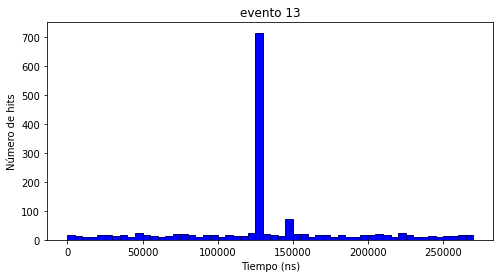

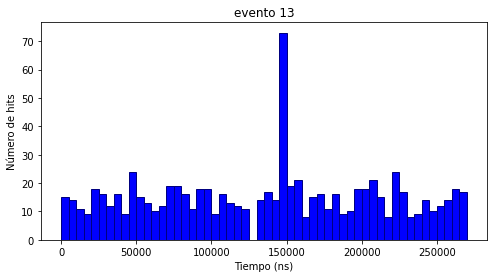

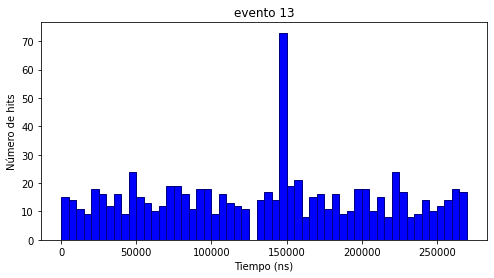

In [39]:
event_number = 13

plt.figure(figsize=(8, 4))
plt.hist(times_branch[event_number], range = [0, 270000], bins = 54,color='blue', edgecolor='navy')
plt.xlabel('Tiempo (ns)')
plt.ylabel('Número de hits')
plt.title(f'evento {event_number}')
plt.show()


plt.figure(figsize=(8, 4))
plt.hist(times_branch_modified[event_number], range = [0, 270000], bins = 54,color='blue', edgecolor='navy')
plt.xlabel('Tiempo (ns)')
plt.ylabel('Número de hits')
plt.title(f'evento {event_number}')
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(times_branch_modified_chargesTT[event_number], range = [0, 270000], bins = 54,color='blue', edgecolor='navy')
plt.xlabel('Tiempo (ns)')
plt.ylabel('Número de hits')
plt.title(f'evento {event_number}')
plt.show()

In [40]:
times_branch_modified_50, threshold_times_50, _ = functions_spills.repeat_spills_nHits(event_number_branch, times_branch_modified_chargesTT, 5, 50, 50)
times_branch_modified_50_sig, threshold_times_50_sig, _ = functions_spills.repeat_spills_nHits(event_number_branch_sig, times_branch_modified_chargesTT_sig, 5, 50, 50)

In [41]:
print(threshold_times_50)

total = sum(len(lista) for lista in threshold_times_50.values())
print("Total de elementos en todas las listas:", total)


{1: [58273.16474023437, 74158.72694726562], 2: [91860.0288794922, 239042.89394027344], 3: [88741.09262171875], 4: [99436.93738359374], 7: [194434.32850019532], 9: [242312.88437007813], 13: [9808.704474414062, 46248.54764827344, 147969.03863457032], 14: [66518.64325260156, 72245.37922621093], 15: [25075.472785742186, 52811.41023328125], 16: [131232.6378494922, 131400.91867734375], 17: [54811.028135039065], 20: [203458.29566398438], 21: [19883.734723632813, 70047.86610332031, 193199.3564523828], 23: [54685.12381875, 59650.07762734375, 91201.33422070312, 180558.78646503907], 24: [42247.05227910156], 25: [219387.4074928125, 233979.93505234376], 28: [119966.59020996094], 30: [128260.89522578125], 33: [102679.69540410156], 34: [236744.17116613282, 253606.84860839843], 37: [36198.151689257815], 38: [506.6620955078125, 23103.354772460938, 152265.59370546875], 39: [232482.3743408203], 40: [62828.456765], 42: [106286.65543777344, 216066.53252070313, 268900.7454092969], 43: [108374.81850488282], 

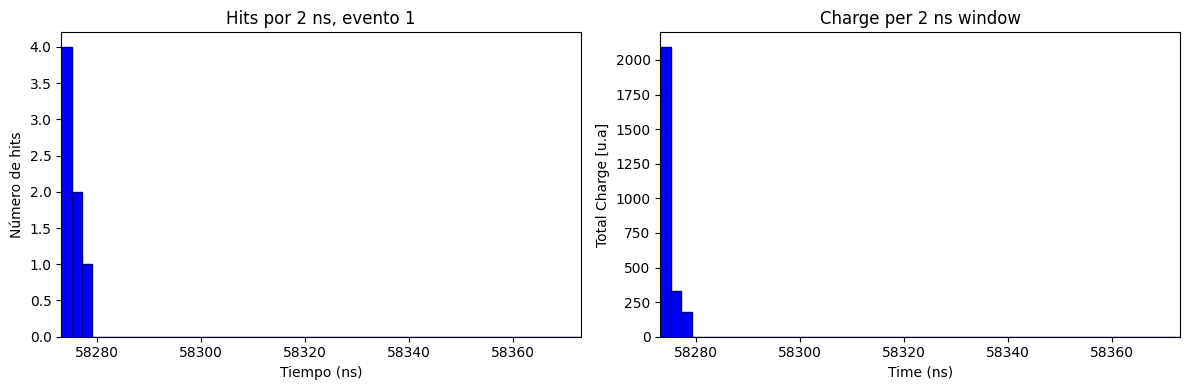

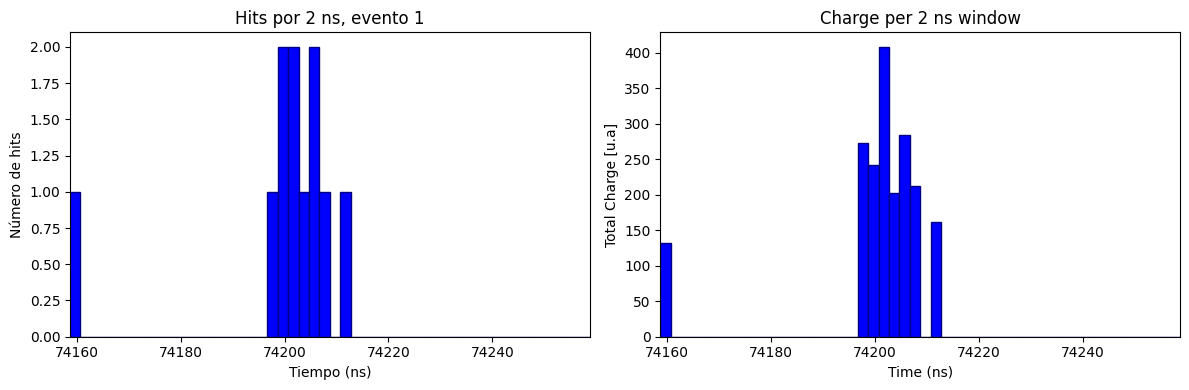

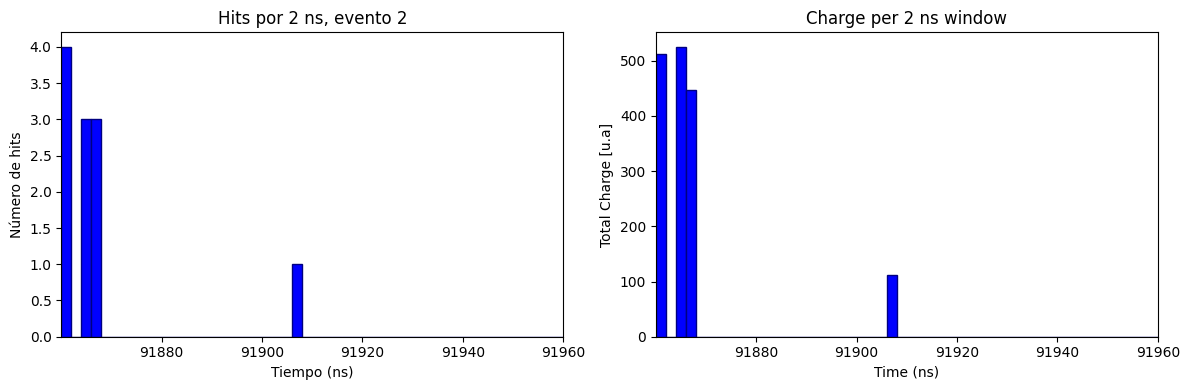

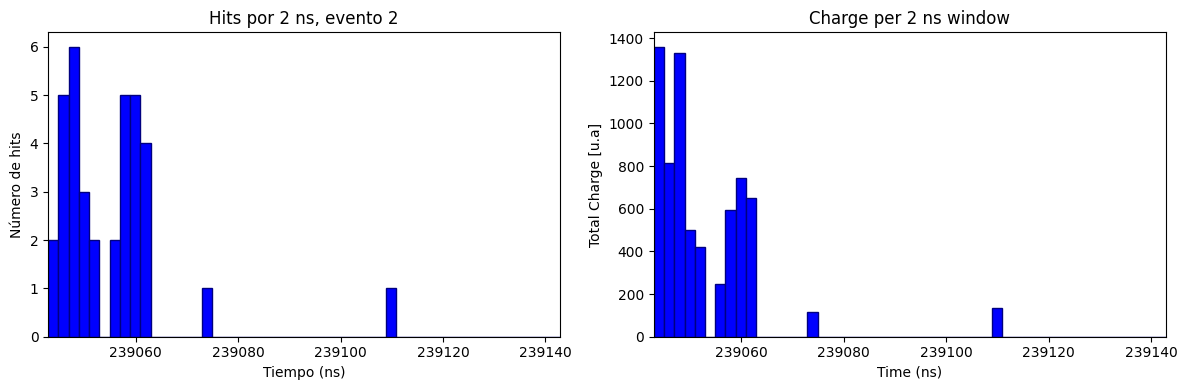

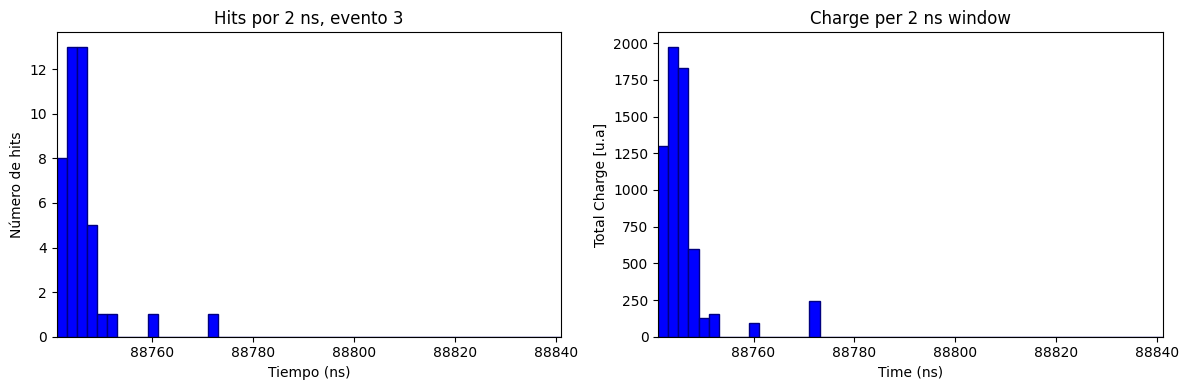

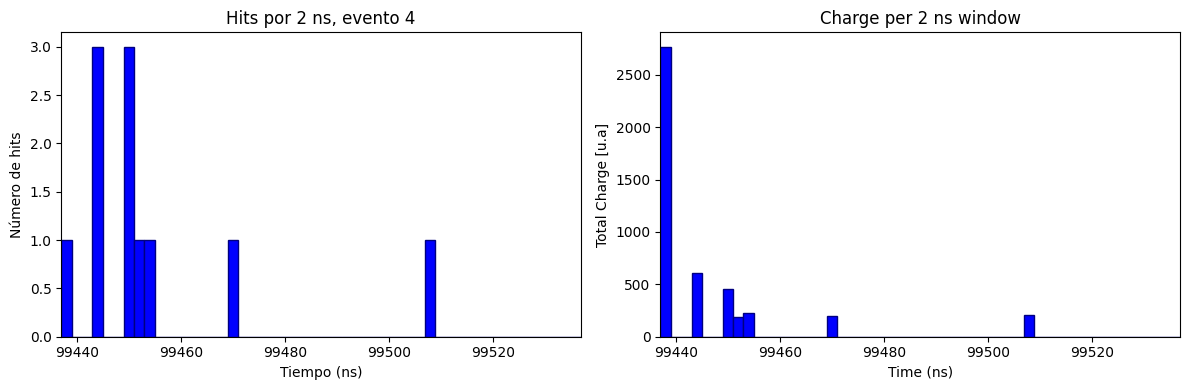

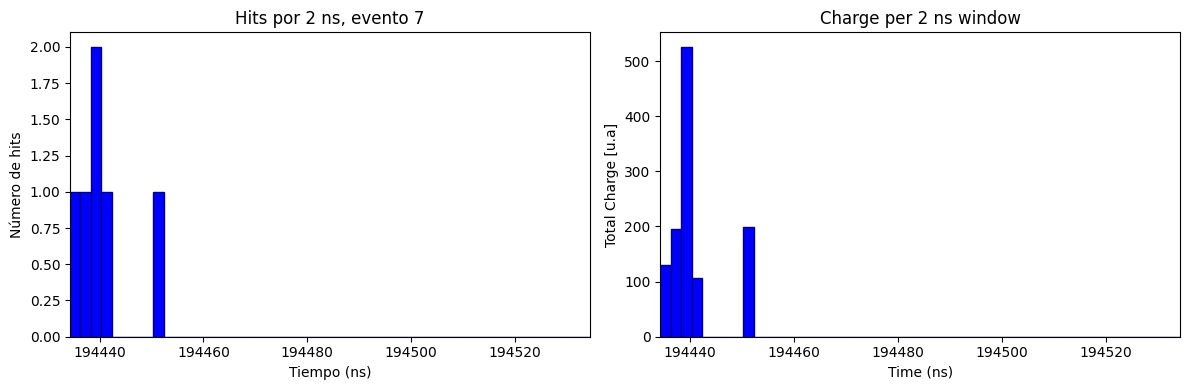

'\n        plt.figure(figsize=(8, 4))\n        plt.hist(charge, bins=100, color=\'blue\', edgecolor=\'navy\')\n        plt.xlabel(\'Charge (u.a)\')\n        plt.ylabel(\'Número de hits\')\n        plt.title("Histograma Charge in 50ns window")\n        plt.show()'

In [42]:
trigger_times_half = dict(list(threshold_times_50.items())[0:5])
bin_time = 2
delta = 100

for event_number in trigger_times_half:
    for start_time in trigger_times_half[event_number]:
        times_branch_event = times_branch[event_number]
        charges_branch_event = charge_branch[event_number]

        mask = (times_branch_event >= start_time) & (times_branch_event < start_time + delta)

        time = times_branch_event[mask]
        charge = charges_branch_event[mask]

        plt.style.use('default')
        fig, axs = plt.subplots(1, 2, figsize=(12, 4))

        # --- Subplot 2: Histograma de número de hits en ventanas de 10 ns ---
        axs[0].hist(time, range=(start_time, start_time + delta), bins=int(delta/bin_time), color='blue', edgecolor='navy')
        axs[0].set_xlabel('Tiempo (ns)')
        axs[0].set_ylabel('Número de hits')
        axs[0].set_title(f"Hits por {bin_time} ns, evento {event_number}")
        axs[0].set_xlim(start_time, start_time+delta)

        sum_charges = functions_spills.plot_TotalCharge_Time(time, charge, bin_time, delta)

        axs[1].bar(np.arange(start_time, start_time+delta, bin_time), sum_charges, width = bin_time, color='blue',  align='edge', edgecolor='navy')
        axs[1].set_xlabel("Time (ns)")
        axs[1].set_ylabel("Total Charge [u.a]")
        axs[1].set_title(f"Charge per {bin_time} ns window")
        axs[1].set_xlim(start_time, start_time+delta)
        plt.tight_layout()
        plt.show()
"""
        plt.figure(figsize=(8, 4))
        plt.hist(charge, bins=100, color='blue', edgecolor='navy')
        plt.xlabel('Charge (u.a)')
        plt.ylabel('Número de hits')
        plt.title("Histograma Charge in 50ns window")
        plt.show()"""

In [43]:
bin_hits = 5000  #dividing windows along 270000 ns
times_array = np.arange(0, 270000+1, bin_hits, dtype=int)

t_RMS = np.zeros((tree.num_entries * len(times_array)))

for i, (times, event_number) in enumerate(zip(times_branch_modified_chargesTT, event_number_branch)):
    
    t_RMS[i*len(times_array): (i+1)*len(times_array)] = functions_spills.time_RMS_fun(times, bin_hits)


In [92]:
t_RMS_sig = np.zeros((tree_sig.num_entries * len(times_array)))

for i, (times, event_number) in enumerate(zip(times_branch_modified_chargesTT_sig, event_number_branch_sig)):
    
    t_RMS_sig[i*len(times_array): (i+1)*len(times_array)] = functions_spills.time_RMS_fun(times, bin_hits)


In [88]:
print(t_RMS)

[154.21980135          nan 367.29311418 ...   0.         177.6334702
          nan]


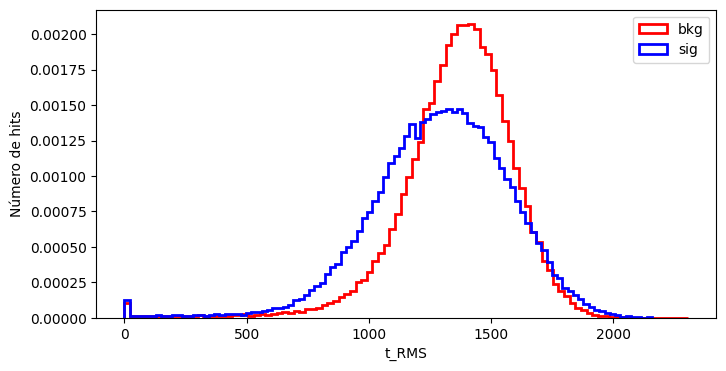

In [95]:
plt.figure(figsize=(8, 4))
plt.hist(t_RMS, bins=100, color='red', histtype='step', linewidth=2, label='bkg', density=True)
plt.hist(t_RMS_sig, bins=100, color='blue', histtype='step', linewidth=2, label='sig', density=True)
plt.xlabel('t_RMS')
plt.ylabel('Número de hits')
plt.legend()
#plt.yscale('log')
plt.show()

In [123]:
def complemento_listas(lista1, lista2):
    resultado = []
    for arr1, arr2 in zip(lista1, lista2):
        # Convertir arr2 en conjunto para búsqueda rápida
        restantes = [x for x in arr1 if x not in arr2]
        resultado.append(np.array(restantes))
    return resultado

times_branch_sup5 = complemento_listas(times_branch_modified_chargesTT, times_branch_modified_50)



In [124]:
nDetections_event_in = []
nDetections_event_fin = []
nDetections_event_inf5 = []
nDetections_event_sup5 = []

for x in times_branch:
    nDetections_event_in.append(len(x))

for x in times_branch_modified_chargesTT:
    nDetections_event_fin.append(len(x))

for x in times_branch_modified_50:
    nDetections_event_inf5.append(len(x))

for x in times_branch_sup5:
    nDetections_event_sup5.append(len(x))



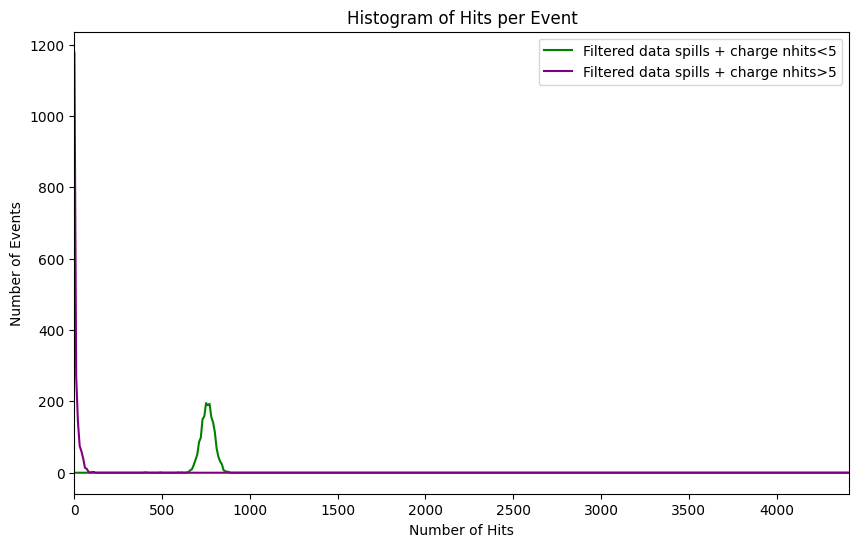

In [127]:
max_hist = 6500
bin_hist =  10 #max_hist / n_bins  
n_bins = int(max_hist / bin_hist)

histogram_in = np.zeros(n_bins)  
histogram_fin = np.zeros(n_bins)
histogram_inf5 = np.zeros(n_bins)
histogram_sup5 = np.zeros(n_bins)

histogram_in = functions_nHits.count_nHits(np.array(nDetections_event_in), bin_hist, histogram_in)
histogram_fin = functions_nHits.count_nHits(np.array(nDetections_event_fin), bin_hist, histogram_fin)
histogram_inf5 = functions_nHits.count_nHits(np.array(nDetections_event_inf5), bin_hist, histogram_inf5)
histogram_sup5 = functions_nHits.count_nHits(np.array(nDetections_event_sup5), bin_hist, histogram_sup5)


plt.style.use('default')  # Asegura el estilo claro

plt.figure(figsize=(10, 6), facecolor='white')
#plt.plot(np.arange(0, max_hist, bin_hist), histogram_in, label='Initial data', color='red')
#plt.plot(np.arange(0, max_hist, bin_hist), histogram_fin, label='Filtered data spills + charge', color='blue')
plt.plot(np.arange(0, max_hist, bin_hist), histogram_inf5, label='Filtered data spills + charge nhits<5', color='green')
plt.plot(np.arange(0, max_hist, bin_hist), histogram_sup5, label='Filtered data spills + charge nhits>5', color='purple')

plt.xlim(0, max(max(nDetections_event_in), max(nDetections_event_fin)))
plt.legend()
plt.xlabel('Number of Hits')
plt.ylabel('Number of Events')
plt.title('Histogram of Hits per Event')

#plt.savefig("/home/cgarcia_2002/nHits_count/Plots_2meeting/Sig_bkg_HitsEvento.png", facecolor='white')
plt.show()

In [137]:
nHits_inf5 = []

for event_number in event_number_branch:

    times_branch_event = times_branch_modified_50[event_number]

    for t in range(0, 270000+1, 50):
        mask = (times_branch_event >= t) & (times_branch_event < t + 50)

        count = mask.sum()
        if count!=0:
            nHits_inf5.append(count)

nHits_sup5 = []

for event_number in event_number_branch:
    times_branch_event = times_branch_sup5[event_number]

    for t in range(0, 270000+1, 50):
        mask = (times_branch_event >= t) & (times_branch_event < t + 50)

        count = mask.sum()
        if count != 0:
            nHits_sup5.append(count)

In [134]:
print(nHits_sup5)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 43, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

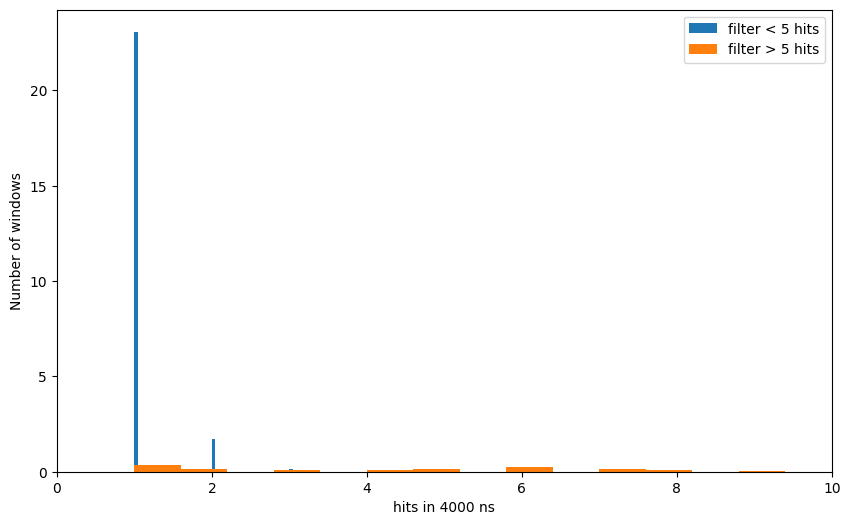

In [139]:
plt.figure(figsize=(10, 6))
plt.hist(nHits_inf5, bins = 100, label="filter < 5 hits", density = True)
plt.hist(nHits_sup5, bins = 100, label = "filter > 5 hits", density = True)
plt.ylabel("Number of windows")
plt.xlabel("hits in 4000 ns")
plt.xlim(0, 10)
#plt.yscale('log')
plt.legend()
plt.show()